In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate net values from -10 to 10
net_values = np.linspace(-100, 100, 1000)


In [ ]:

# Sigmoid function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
  return sigmoid(x) * (1 - sigmoid(x))

# Calculate sigmoid and its derivative for the net values
sigmoid_values = sigmoid(net_values)
derivative_values = sigmoid_derivative(net_values)

print (sigmoid_values)
print (derivative_values)

[3.72007598e-44 4.54462080e-44 5.55192377e-44 6.78249272e-44
 8.28581397e-44 1.01223423e-43 1.23659323e-43 1.51068078e-43
 1.84551911e-43 2.25457346e-43 2.75429359e-43 3.36477535e-43
 4.11056875e-43 5.02166525e-43 6.13470383e-43 7.49444442e-43
 9.15556785e-43 1.11848748e-42 1.36639722e-42 1.66925548e-42
 2.03924147e-42 2.49123385e-42 3.04340913e-42 3.71797257e-42
 4.54205117e-42 5.54878459e-42 6.77865775e-42 8.28112900e-42
 1.01166189e-41 1.23589403e-41 1.50982661e-41 1.84447562e-41
 2.25329867e-41 2.75273626e-41 3.36287284e-41 4.10824455e-41
 5.01882589e-41 6.13123514e-41 7.49020690e-41 9.15039109e-41
 1.11785506e-40 1.36562463e-40 1.66831165e-40 2.03808844e-40
 2.48982525e-40 3.04168832e-40 3.71587034e-40 4.53948300e-40
 5.54564719e-40 6.77482496e-40 8.27644667e-40 1.01108988e-39
 1.23519523e-39 1.50897293e-39 1.84343271e-39 2.25202461e-39
 2.75117980e-39 3.36097140e-39 4.10592166e-39 5.01598814e-39
 6.12776840e-39 7.48597177e-39 9.14521726e-39 1.11722300e-38
 1.36485248e-38 1.667368

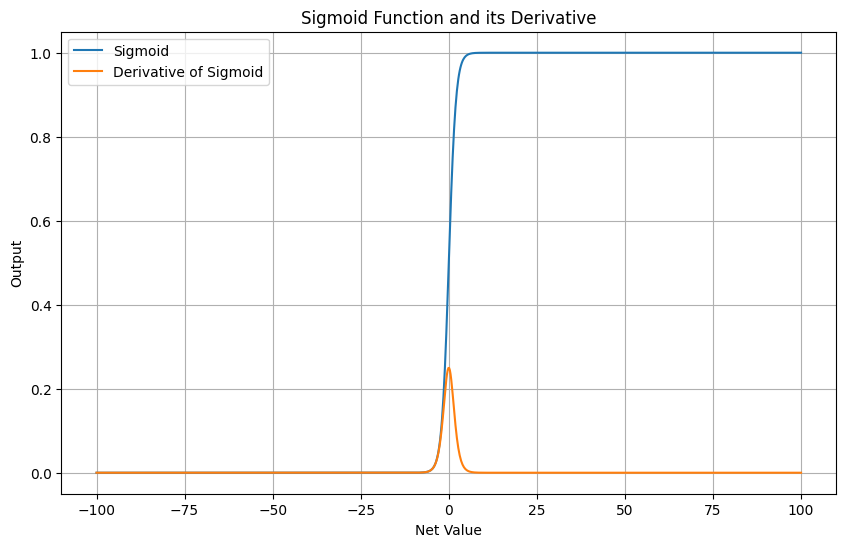

In [ ]:

# Plot the sigmoid function
plt.figure(figsize=(10, 6))
plt.plot(net_values, sigmoid_values, label='Sigmoid')

# Plot the derivative of the sigmoid function
plt.plot(net_values, derivative_values, label='Derivative of Sigmoid')


plt.xlabel('Net Value')
plt.ylabel('Output')
plt.title('Sigmoid Function and its Derivative')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
import pandas as pd


In [ ]:
data = pd.read_csv('/content/diabetes (1).csv')

In [ ]:
data.shape

(768, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_test.shape


(154,)

In [ ]:
# prompt: import logistic regression after we do normalization on the features only

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = MinMaxScaler()
# Fit and transform on the training data only
X_train = scaler.fit_transform(X_train)
# Transform the test data using the fitted scaler
X_test = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)

# Make predictions on the test set
y_predr = model_1.predict(X_train)
# Make predictions on the test set
y_preds = model_1.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_preds)
print(f"Accuracy: {accuracy}")
accuracy = accuracy_score(y_train, y_predr)
print(f"Train Accuracy: {accuracy}")

Accuracy: 0.7532467532467533
Train Accuracy: 0.754071661237785


In [ ]:
  from sklearn.metrics import classification_report # Import the classification_report function
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.68      0.58      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
#from confusion matrix
#unbalanced data set as the model is baised to class zero
#then now we need to balance the two training classes data augmentation

Accuracy: 0.7532467532467533
Train Accuracy: 0.754071661237785
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.68      0.58      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

Confusion Matrix:
[[84 15]
 [23 32]]


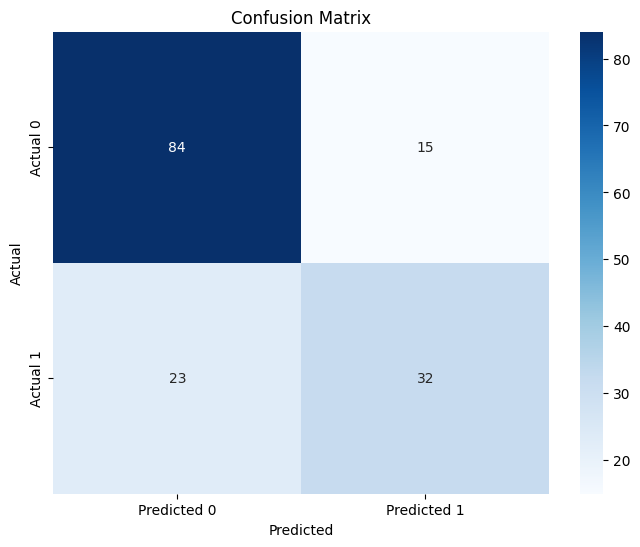

In [ ]:
from sklearn.metrics import confusion_matrix # Import confusion_matrix
import seaborn as sns # Import seaborn for better visualization
# Make predictions on the test set
y_predr = model_1.predict(X_train)
# Make predictions on the test set
y_preds = model_1.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_preds)
print(f"Accuracy: {accuracy}")
accuracy = accuracy_score(y_train, y_predr)
print(f"Train Accuracy: {accuracy}")
print(classification_report(y_test, y_preds))

# Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense
data = pd.read_csv('/content/diabetes (2).csv')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [35]:

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import layers

model = keras.Sequential([
    layers.Dense(23, activation='relu', input_shape=(8,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 23)             │           207 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 608 (2.38 KB)

 Trainable params: 608 (2.38 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [38]:
trained = model.fit(X_train_scaled, y_train,
epochs=100,batch_size=32,validation_split = 0.2,verbose=1)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6409 - loss: 0.7198 - val_accuracy: 0.6504 - val_loss: 0.6594
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6557 - loss: 0.6606 - val_accuracy: 0.6748 - val_loss: 0.6161
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6752 - loss: 0.6349 - val_accuracy: 0.6911 - val_loss: 0.5853
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6660 - loss: 0.6054 - val_accuracy: 0.7317 - val_loss: 0.5540
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7096 - loss: 0.5666 - val_accuracy: 0.7236 - val_loss: 0.5304
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7399 - loss: 0.5353 - val_accuracy: 0.7561 - val_loss: 0.5139
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7128 - loss: 0.5507 - val_accuracy: 0.7480 - val_loss: 0.4995
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7317 - loss: 0.5338 - val_accuracy: 0.7561 - 

In [30]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7298 - loss: 0.6080 
Test Accuracy: 0.74


In [31]:
predictions = model.predict(X_test_scaled)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [32]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7298 - loss: 0.6080 
Test Accuracy: 0.74


Confusion Matrix (Keras):
[[81 19]
 [21 33]]


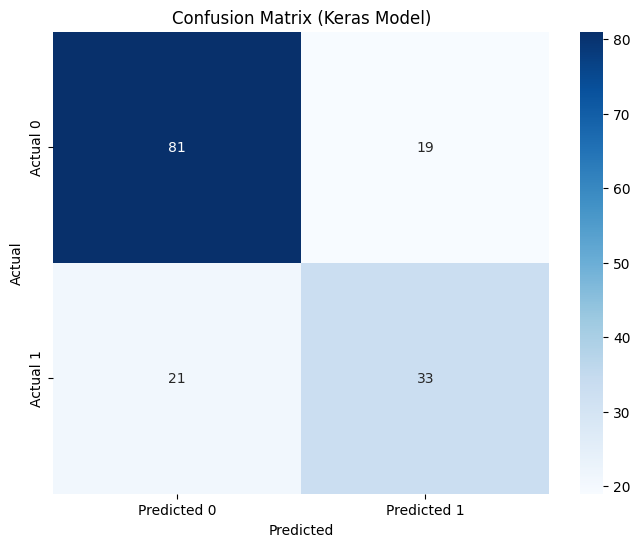

In [34]:
import seaborn as sns # Import seaborn for better visualization
import matplotlib.pyplot as plt # Import matplotlib for plotting
from sklearn.metrics import confusion_matrix #
y_pred_keras = (predictions > 0.5).astype(int)

# Confusion Matrix for Keras model
cm_keras = confusion_matrix(y_test, y_pred_keras)
print("Confusion Matrix (Keras):")
print(cm_keras)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_keras, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Keras Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
